<a href="https://colab.research.google.com/github/compi1234/pyspch/blob/master/test/spectrogram_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transcriptions of Speech
### Discrete Labels and Alignments for a Continuous Signal 

Speech is a continuous signal without abrupt boundaries in the sequence of underlying sounds.
Written language or a transcription of the speech signal is a sequence of discrete symbols.
The simple fact that we can make such transcriptions suggests that 2 levels of discretization are plausible:   
- boundaries in time between two successive sounds
- categorical boundaries in an alphabet of elementary speech sounds

Depending on the language,
the symbol set (sound alphabet) can be letters that symbolize abstract sounds or larger units such as syllables or even words.

This mapping from continous signal to discrete representation is far less trivial than human intuition and transcriptions may suggest.

Date: 16/08/2021 , 14/09/2021  
Author: Dirk Van Compernolle

## First do all the imports

In [1]:
#
# You need to have the pyspch package installed in your python environment
# !pip install git+https://github.com/compi1234/pyspch.git
#

In [2]:
%matplotlib inline
import os,sys,io 
import scipy.signal

from urllib.request import urlopen
from IPython.display import display, Audio, HTML, clear_output
from ipywidgets import interact

import math,time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#from pyspch import spectrogram, audio
import pyspch.audio as Spa
import pyspch.spg as Sps
import pyspch.display as Spd
import pyspch.io.timit as Spio

## 1. Read in audio data and compute spectrograms

In [3]:
# Some audio examples to choose from in https://homes.esat.kuleuven.be/~spchlab/data
# timit/   si1027, sa1, sx313
# misc/    friendly, m1, f1, f2, ..  
dir = 'https://homes.esat.kuleuven.be/~spchlab/data/'
name = 'misc/friendly'
#name = 'timit/si1027'
#
wavfname = os.path.join(dir,name+".wav")
wavdata, sr = Spa.load(wavfname)
# get segmentations and convert TIMIT segmentations from sample indices to time, plus map from the TIMIT61 alphabet to CMU
if name.split('/')[0] == 'timit':
    dsegt = 1./16000.
    xlat = 'map61_cmu'
else:
    dsegt = 1.
    xlat = None
segwrd = Spio.read_seg_file(dir+name+ ".wrd",dt=dsegt,fmt='float32')
segsyl = Spio.read_seg_file(dir+name+ ".syl",dt=dsegt,fmt='float32')
seggra = Spio.read_seg_file(dir+name+ ".gra",dt=dsegt,fmt='float32')
segphn = Spio.read_seg_file(dir+name+ ".phn",dt=dsegt,fmt='float32',xlat=xlat)

# compute spectrograms 
shift=0.01
spgfreq = Sps.spectrogram(wavdata,sample_rate=sr,f_shift=shift)
(nparam,nfr)=spgfreq.shape
d_freq = sr/(2.*(nparam-1))

## 2. Levels of Transcriptions

We can make different levels of transcriptions of speech:   
- word
- syllable
- letter
- phoneme

We should make a distinction between a **transcription** and a **segmentation** .  In the case of a **transcription** we merely give a transcipt at the correct level.  In case of a **segmentation** we align the transcription to the waveform as well, i.e. we provide begin and end times for each segment.

The ambiguity for *word transcriptions* is minimal if the quality of speech is moderate or good.  On the other hand *segmentations* at the *letter of phoneme* level are highly *ambiguous*.   First of all speech is a continous signal without clear segmental boundaries, thus marking such boundaries is fuzzy business by nature.  Moreover, when listening to very short segments of speech, different transcribers will often disagree on the nature of the speech sounds.

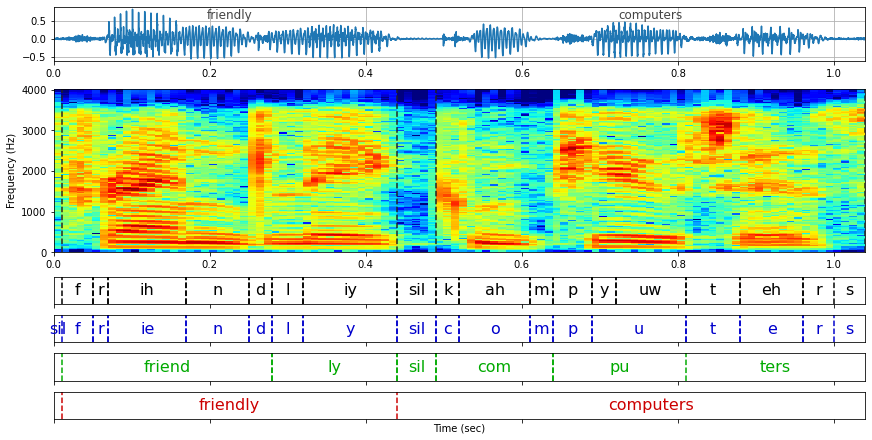

In [4]:
fig = Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spgfreq,segdata=[segphn,seggra,segsyl,segwrd],   
              sample_rate=sr,dy=None)
seg=segwrd
fig.add_seg_plot(seg,iax=0,ypos=0.85,color="#444",size=12,Lines=False)
fig.add_seg_plot(seg,iax=1,ypos=None,color="#222")
display(fig)